In [ ]:
 # This is the same code from the previous section, nothing new here.
try:
  # We must install required packages if we are in Google Colab
  import google.colab
  %pip install roboticstoolbox-python>=1.0.2
except:
  # We are not in Google Colab
  # Apply custon style to notebook
  from IPython.core.display import HTML
  import pathlib
  styles_path = pathlib.Path(pathlib.Path().absolute(), "style", "style.css")
  styles = open(styles_path, "r").read()
  HTML(f"<style>{styles}</style>")

# These three functions are used for the rotation matrices and match the ones discussed in part one of the tutorial

# This defines the function Rx
# This is used when we are rotating about the x-axis
def Rx(theta):
    Rx_matrix = np.array([
        [1, 0, 0, 0],
        [0, np.cos(theta), -np.sin(theta), 0],
        [0, np.sin(theta), np.cos(theta), 0],
        [0, 0, 0, 1]
    ])

    return Rx_matrix

# This defines the function Ry
# This is used when we are rotating about the y-axis
# We do not actually need to use this function in our code but it is here just in case
def Ry(theta):
    Ry_matrix = np.array([
        [np.cos(theta), 0, np.sin(theta), 0],
        [0, 1, 0, 0],
        [-np.sin(theta), 0, np.cos(theta), 0],
        [0, 0, 0, 1]
    ])

    return Ry_matrix

# This defines the function Rz
# This is used when we are rotating about the z-axis
def Rz(theta):
    Rz_matrix = np.array([
        [np.cos(theta), -np.sin(theta), 0, 0],
        [np.sin(theta), np.cos(theta), 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]
    ])

    return Rz_matrix

# This defines the function T
# This function combines all the individual translation matrices into a singular function
def T(dx, dy, dz):
    T_matrix = np.array([
        [1, 0, 0, dx],
        [0, 1, 0, dy],
        [0, 0, 1, dz],
        [0, 0, 0, 1]
    ])

    return T_matrix


# 2.0 Velocity Kinematics

## Table of Contents

### 2.1 Introduction
### 2.2 Linear Jacobian
### 2.3 Angular Jacobian
### 2.4 Manipulator Jacobian
### 2.5 Example

#2.1 Introduction
The next component of Forward Kinematics is the Velocity kinematics. Previously, we had solely just focused on the position kinematics which looks at how the position of the end effector changes with respect to the base frame as a function of the 7 joints. Velocity kinematics is essentially the same thing, but instead of positions we will focus on velocities. Our end objective is to form a matrix similar to the Homogeneous Transformation Matrix but for velocities rather than positions. The name of this matrix is the Manipulator Jacobian but it is quite large and complicated so it is often broken down into more easily understandable parts.


In [ ]:
# This is our Jacobian Function that requires the input q_values.
# The q_values are just the angular displacments of the joints
def J(q_values):
    q1, q2, q3, q4, q5, q6, q7 = q_values

# These are all of the elementary transforms which we previously saw in Position Kinematics
    E1 = T(0, 0, 0.15643)
    E2 = Rx(np.pi)
    E3 = Rz(q1)
    E4 = T(0, 0, -0.12838)
    E5 = T(0, 0.00538, 0)
    E6 = Rx(np.pi/2)
    E7 = Rz(q2)
    E8 = T(0, 0, -0.00638)
    E9 = T(0, -0.21038, 0)
    E10 = Rx(-np.pi/2)
    E11 = Rz(q3)
    E12 = T(0, 0, -0.21038)
    E13 = T(0, 0.00638, 0)
    E14 = Rx(np.pi/2)
    E15 = Rz(q4)
    E16 = T(0, 0, -0.00638)
    E17 = T(0, -0.20843, 0)
    E18 = Rx(-np.pi/2)
    E19 = Rz(q5)
    E20 = T(0, 0, -0.10593)
    E21 = Rx(np.pi/2)
    E22 = Rz(q6)
    E23 = T(0, -0.10593, 0)
    E24 = Rx(-np.pi/2)
    E25 = Rz(q7)
    E26 = T(0, 0, -0.06153)
    E27 = Rx(np.pi)

# This is used to create 8 different matrices
# Each matrix relates the motion of a specific joint with respect to the base
    A = [None] * 9
    A[1] = np.linalg.multi_dot([E1, E2, E3])
    A[2] = np.linalg.multi_dot([E1, E2, E3, E4, E5, E6, E7])
    A[3] = np.linalg.multi_dot([E1, E2, E3, E4, E5, E6, E7, E8, E9, E10, E11])
    A[4] = np.linalg.multi_dot([E1, E2, E3, E4, E5, E6, E7, E8, E9, E10, E11, E12, E13, E14, E15])
    A[5] = np.linalg.multi_dot([E1, E2, E3, E4, E5, E6, E7, E8, E9, E10, E11, E12, E13, E14, E15, E16, E17, E18, E19])
    A[6] = np.linalg.multi_dot([E1, E2, E3, E4, E5, E6, E7, E8, E9, E10, E11, E12, E13, E14, E15, E16, E17, E18, E19, E20, E21, E22])
    A[7] = np.linalg.multi_dot([E1, E2, E3, E4, E5, E6, E7, E8, E9, E10, E11, E12, E13, E14, E15, E16, E17, E18, E19, E20, E21, E22, E23, E24, E25])
    A[8] = np.linalg.multi_dot([E1, E2, E3, E4, E5, E6, E7, E8, E9, E10, E11, E12, E13, E14, E15, E16, E17, E18, E19, E20, E21, E22, E23, E24, E25, E26, E27])

# Fixing the base
    t0 = np.array([0, 0, 0])
    z0 = np.array([0, 0, 1])

# Initialize lists to store t and z
    t = [np.empty((3, 0))] * 9
    z = [np.empty((3, 0))] * 9

# Used to get the translations and the rotation for the z-axis from the individual homogenous matrices
# Loop through A to extract the last column for t and the third column for z
    for i in range(1, 9):
     t[i] = A[i][:-1, -1]
     z[i] = A[i][:-1, 2]


# Initialize a list to store the cross products
    cp = [None] * 9


#2.2 Linear Jacobian
The first part is the Linear Jacobian. The Linear Jacobian focuses on the linear velocity of each joint and hence the name Linear Jacobian. The linear Jacobian is derived from the Homogeneous Transformation Matrix. The Linear Jacobian can be calculated in a few ways, both of which result in the exact same matrix. The method used in this tutorial consists of using the equation below. The term at the top of the matrix uses the relationship between linear velocity and angular velocity, this equation is used for rotational joints. The equation below it is used for translational joints, but the robotic arm used for this tutorial lacks translational joints. So, we will only look at the first term. This equation is  the same as the equation v = w x r, where v is the linear velocity, w is the angular velocity, and r is the radius.


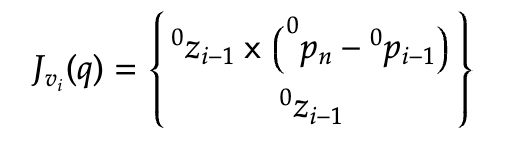

Figure 1: Linear Jacobian


In the above figure,
1. <sup>0</sup>z<sub>i-1</sub> is the axis about which joint i rotates about.
2. <sup>0</sup>p<sub>n</sub> is the position of joint i with respect the base frame in Cartesian Space.
3. <sup>0</sup>p<sub>n-1</sub> is the position of joint i-1 with respect to the base in Cartesian Space

For our arm, <sup>0</sup>z<sub>i-1</sub> is a 3x1 vector and is always [0 0 1] for our arm. <sup>0</sup>p<sub>n</sub> is the position vector and is also a 3x1 vector and the values are given from the last column of the Homogeneous Transformation Matrix.

The Linear Jacbian will then be a 3xn matrix, where n is the number of DOF. Each row corresponds to an axis, the first row provides information regarding the linear velocity in the x-axis, the second is for the y-axis, and the third is for the z-axis. The columns on the other hand, correspond to a specific joint. Therefore, the Linear Jacobian will allow us to know the linear velocity in all directions for every single joint. For this tutorial, the number of DOF is 7 and thus the matrix will be a 3x7. The way we would use this equation is by doing this for i = 0 all the way to i = 7, then stacking the resulting vectors horizontally resulting in a 3x7 matrix.

In [ ]:
# Calculate the cross products for each pair of vectors (z{i}, (t{end} - t{i}))
    cp[1] = np.cross(z0, (t[-1] - t0))
    cp[2] = np.cross(z[1], (t[-1] - t[1]))
    cp[3] = np.cross(z[2], (t[-1] - t[2]))
    cp[4] = np.cross(z[3], (t[-1] - t[3]))
    cp[5] = np.cross(z[4], (t[-1] - t[4]))
    cp[6] = np.cross(z[5], (t[-1] - t[5]))
    cp[7] = np.cross(z[6], (t[-1] - t[6]))
    cp[8] = np.cross(z[7], (t[-1] - t[7]))


# 2.3 Angular Jacobian

The second part is the Angular Jacobian. As the name suggests, the Angular Jacobian focuses on angular velocities and is much more simple. The Angular Jacobian is very easy to calculate. The equation used is seen in Figure 2. Once again, the term at the top of the matrix is used for rotational joints and the term at the bottom is used for translational joints. Due to the Kinova Gen 3 Robotic Arm only containing rotational joints, the bottom term can be ignored.


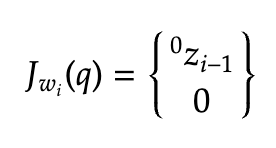

Figure 2: Angular Jacobian


The Angular Jacobian is a 3xn matrix where each column represents a joint and each row corresponds to rotation about a specific axis. The first row is for the rotation about the x-axis, the second is for the y-axis, and the third is for the z-axis. For our tutorial, we designed it in such a way that rotation only happens about the z-axis which simplifies the Angular Jacobian. Thus, our Angular Jacobian will be a 3x7 matrix where row 1 and 2 are all zeros and row 3 is all ones. The first two rows are zero because there is no angular velocity experienced by the joints about the x-axis or y-axis. The last row is filled with ones because there is angular velocity experienced by the joints about the z-axis.

# 2.4 Manipulator Jacobian

Now that we have created the Linear Jacobian and Angular Jacobian, we can create the Manipulator Jacobian. The Manipulator Jacobian is simply created by stacking the Linear Jacobian on top of the Angular Jacobian. This results in a 6xn matrix where the first three rows make up the linear portion and the bottom 3 rows make up the angular portion. The Manipulator Jacobian for this tutorial would be a 6x7 matrix. Figure 3 can be helpful.

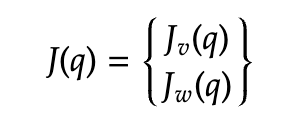

Figure 3: Manipulator Jacobian

In [ ]:
# Horizontally stack each column to form the Manipulator Jacobian
# We also remove the first column because that relates the base to joint 1
# This is because there is no motion occuring between the base and first joint
    #J = v[1:]
    J = np.hstack([v[1],v[2],v[3],v[4],v[5],v[6],v[7],v[8]])
    J = np.delete(J, 0, axis=1)

    return J

# 2.5 Example

Insert an example with joint angles (same as the position kinematics) then show two examples with different joint velocities and the resulting Jacobian Matrix. Include a visual of the motion.